In [57]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Inspection

In [42]:
df= pd.read_csv("class-grades 1.csv", on_bad_lines='skip')

In [89]:
#Displaying first 5 rows of the dataset
df.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final,OverallGrade
0,5,57.14,34.09,64.38,51.48,52.50,54.947
1,8,95.05,105.49,67.50,99.07,68.33,83.289
2,8,83.70,83.17,30.00,63.15,48.89,56.465
3,7,81.22,96.06,49.38,105.93,80.56,77.962
4,8,91.32,93.64,95.00,107.41,73.89,92.388


In [83]:
#Checking the data types of each column
df.dtypes

Prefix            int64
Assignment      float64
Tutorial        float64
Midterm         float64
TakeHome        float64
Final           float64
OverallGrade    float64
dtype: object

## Handling Missing Values

In [114]:
#Checking for null values
df.isnull().sum()

Prefix          0
Assignment      0
Tutorial        0
Midterm         0
TakeHome        0
Final           0
OverallGrade    0
dtype: int64


## Implement Imputation Strategy

In [124]:
df.fillna(df.mean(), inplace=True)

In [128]:
df.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final,OverallGrade
0,5,57.14,34.09,64.38,51.48,52.50,54.947
1,8,95.05,105.49,67.50,99.07,68.33,83.289
2,8,83.70,83.17,30.00,63.15,48.89,56.465
3,7,81.22,96.06,49.38,105.93,80.56,77.962
4,8,91.32,93.64,95.00,107.41,73.89,92.388


## Data Exploration

In [130]:
#Computing summary statistics
df.describe()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final,OverallGrade
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,7.312500,85.809896,89.631875,68.444271,81.406737,68.414375,76.622670
std,0.932597,12.498312,15.243599,19.472524,23.319775,18.801087,13.609961
min,4.000000,28.140000,34.090000,28.120000,16.910000,28.060000,47.523000
25%,7.000000,81.220000,83.170000,52.965000,69.905000,53.122500,66.860000
50%,8.000000,90.020000,93.370000,70.000000,87.960000,66.250000,76.115000
75%,8.000000,95.012500,100.535000,83.277500,99.070000,84.167500,88.562000
max,8.000000,100.830000,112.580000,110.000000,108.890000,108.890000,103.764000


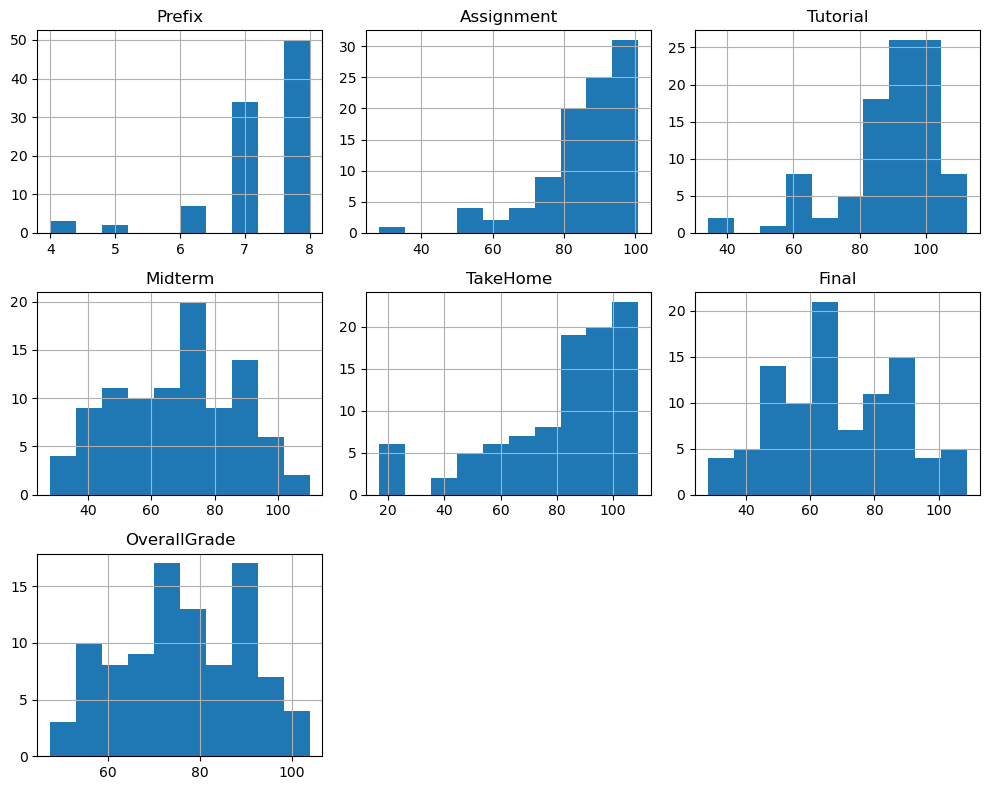

In [132]:
#Visualizing the distribution of grades for each assessment using histogram
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

## Explore correlation

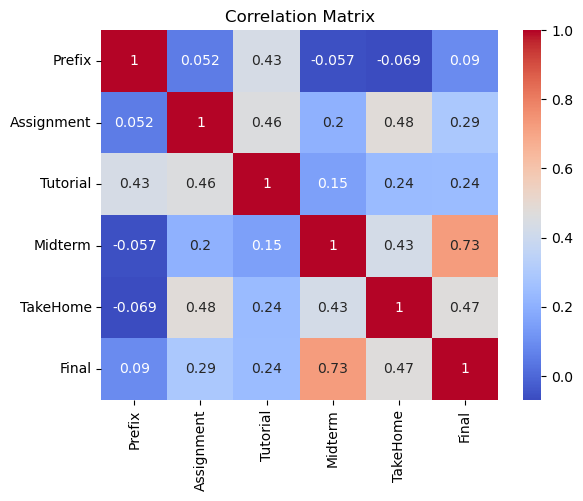

In [48]:
#Exploring the correlation between different assessment using correlation matrix 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Grade Aggregation

In [152]:
#Calculating the overall grade for each student
weights = {'Assignment': 0.2, 'Tutorial': 0.1, 'Midterm': 0.3, 'TakeHome': 0.2, 'Final': 0.2}
df['OverallGrade'] = (df['Assignment'] * weights['Assignment'] +
                      df['Tutorial'] * weights['Tutorial'] +
                      df['Midterm'] * weights['Midterm'] +
                      df['TakeHome'] * weights['TakeHome'] +
                      df['Final'] * weights['Final'])
df['OverallGrade'].head()

0    54.947
1    83.289
2    56.465
3    77.962
4    92.388
Name: OverallGrade, dtype: float64

## Visualize overall grades

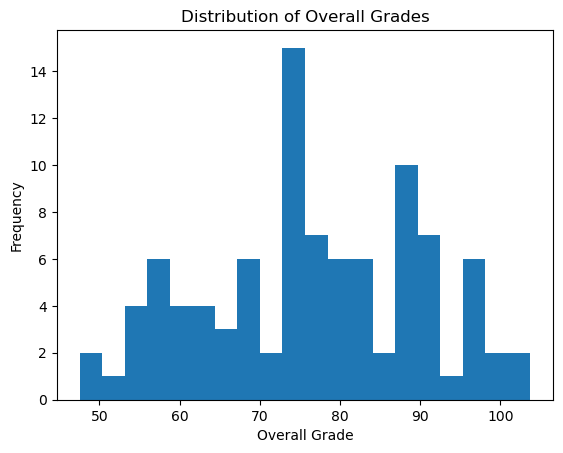

In [75]:
plt.hist(df['OverallGrade'], bins=20)
plt.xlabel('Overall Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Grades')
plt.show()

## Performance Analysis

In [63]:
#Analyzing the distribution of final grades to identify the proportion of students passing or failing the course
passing_grade = 60 
passing_students = df[df['Final'] >= passing_grade]
failing_students = df[df['Final'] < passing_grade]
passing_rate = len(passing_students) / len(df) * 100
failing_rate = len(failing_students) / len(df) * 100
print("Passing rate: {:.2f}%".format(passing_rate))
print("Failing rate: {:.2f}%".format(failing_rate))


Passing rate: 65.62%
Failing rate: 34.38%


## Compare performance 

In [148]:
#Comparing the performance of students, where students perform well or struggle
mean_grades = df.mean()
mean_grades

Prefix           7.312500
Assignment      85.809896
Tutorial        89.631875
Midterm         68.444271
TakeHome        81.406737
Final           68.414375
OverallGrade    76.622670
dtype: float64

## several key insights can be derived



Performance Distribution: The distribution of grades across different assessment components shows variations in student performance. Some students perform well in certain components while struggling in others.

Correlation Analysis: There are correlations between different assessment components, indicating that performance in one component may influence performance in another. For instance, strong performance in assignments might correlate with good midterm exam results.

Overall Grade Calculation: Aggregating grades from different assessment components provides an overall grade for each student. This can help identify students who excel across all components as well as those who may need additional support.

Passing Rate: The analysis reveals the proportion of students passing and failing the course based on a predefined passing grade. This information is crucial for understanding the overall success rate of students in the rm better academically.

# recommendations for improving student performance:

Targeted Support: Identify areas where students struggle the most, such as specific assessment components with lower average grades. Provide targeted support such as additional tutoring sessions, study groups, or office hours to help students improve in those areas.

Feedback Mechanism: Implement a feedback mechanism to provide students with constructive feedback on their performance in each assessment component. This can help them understand their strengths and weaknesses, enabling them to focus on areas needing improvement.

Revision of Course Material: Review and revise course material for areas where students consistently perform poorly. Ensure that the material is clear, comprehensive, and aligned with the assessment objectives to facilitate better understanding and performance.

Diversify Assessment Methods: Consider diversifying assessment methods to assess student learning comprehensively. Incorporate a mix of assignments, quizzes, exams, and practical projects to cater to different learning styles and abilities.

Early Intervention: Implement early intervention strategies to identify students at risk of failing the course and provide them with timely support. This could involve proactive monitoring of student progress, reaching out to struggling students, and offering personalized assistance.

Promote Engagement: Foster a supportive learning environment by encouraging student engagement through interactive lectures, group discussions, and hands-on activities. Engaged students are more likely to be motivated and perform better academically.